<a href="https://colab.research.google.com/github/3umin/DL4AI_Class/blob/main/week4/chapter04_getting-started-with-neural-networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [4]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [5]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
train_labels[0]

1

In [7]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [8]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [9]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [11]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [13]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

model_w3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation='tanh'),
    layers.Dense(1, activation="sigmoid")
])

model_w3.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

In [15]:
from tensorflow import keras
from tensorflow.keras import layers

model_w4 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation="sigmoid")
])

model_w4.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [16]:
from tensorflow import keras
from tensorflow.keras import layers

model_munit = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_munit.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [17]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [19]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 52ms/step - loss: 0.0207 - accuracy: 0.9966 - val_loss: 0.5466 - val_accuracy: 0.8701
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0158 - accuracy: 0.9985 - val_loss: 0.5694 - val_accuracy: 0.8684
Epoch 3/20
30/30 [==============================] - 1s 45ms/step - loss: 0.0149 - accuracy: 0.9981 - val_loss: 0.5923 - val_accuracy: 0.8690
Epoch 4/20
30/30 [==============================] - 1s 41ms/step - loss: 0.0139 - accuracy: 0.9980 - val_loss: 0.6159 - val_accuracy: 0.8684
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0084 - accuracy: 0.9998 - val_loss: 0.6800 - val_accuracy: 0.8558
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0111 - accuracy: 0.9989 - val_loss: 0.6590 - val_accuracy: 0.8677
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0062 - accuracy: 0.9998 - val_loss: 0.6837 - val_accuracy: 0.8656
Epoch 8/20
30

In [20]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [21]:
history_w3 = model_w3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 53ms/step - loss: 0.0070 - accuracy: 0.9933 - val_loss: 0.1064 - val_accuracy: 0.8734
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0113 - accuracy: 0.9875 - val_loss: 0.1075 - val_accuracy: 0.8740
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0068 - accuracy: 0.9933 - val_loss: 0.1075 - val_accuracy: 0.8747
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0098 - accuracy: 0.9891 - val_loss: 0.1107 - val_accuracy: 0.8714
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0112 - accuracy: 0.9872 - val_loss: 0.1093 - val_accuracy: 0.8739
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0064 - accuracy: 0.9938 - val_loss: 0.1101 - val_accuracy: 0.8738
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0065 - accuracy: 0.9935 - val_loss: 0.1425 - val_accuracy: 0.8398
Epoch 8/20
30

In [22]:
history_dict_w3 = history_w3.history
history_dict_w3.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [33]:
history_munit = model_munit.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 53ms/step - loss: 0.5354 - accuracy: 0.7584 - val_loss: 0.4096 - val_accuracy: 0.8437
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3231 - accuracy: 0.8881 - val_loss: 0.3268 - val_accuracy: 0.8713
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2426 - accuracy: 0.9142 - val_loss: 0.2792 - val_accuracy: 0.8890
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1965 - accuracy: 0.9318 - val_loss: 0.2760 - val_accuracy: 0.8863
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1601 - accuracy: 0.9441 - val_loss: 0.3407 - val_accuracy: 0.8676
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1415 - accuracy: 0.9523 - val_loss: 0.2891 - val_accuracy: 0.8845
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1171 - accuracy: 0.9627 - val_loss: 0.3046 - val_accuracy: 0.8826
Epoch 8/20
30

In [34]:
history_dict_munit = history_munit.history
history_dict_munit.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [38]:
history_w4 = model_w4.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 62ms/step - loss: 0.5613 - accuracy: 0.7481 - val_loss: 0.4131 - val_accuracy: 0.8516
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3324 - accuracy: 0.8849 - val_loss: 0.3040 - val_accuracy: 0.8861
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2376 - accuracy: 0.9167 - val_loss: 0.2800 - val_accuracy: 0.8885
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1878 - accuracy: 0.9331 - val_loss: 0.2815 - val_accuracy: 0.8878
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1526 - accuracy: 0.9471 - val_loss: 0.2878 - val_accuracy: 0.8844
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1231 - accuracy: 0.9599 - val_loss: 0.3055 - val_accuracy: 0.8832
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1007 - accuracy: 0.9685 - val_loss: 0.3334 - val_accuracy: 0.8834
Epoch 8/20
30

**Plotting the training and validation loss**

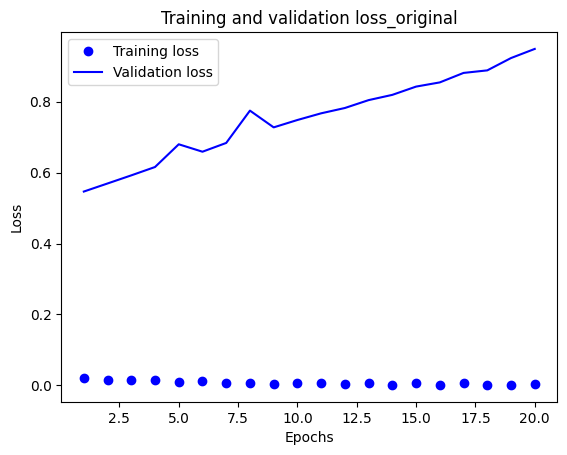

In [23]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss_original")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

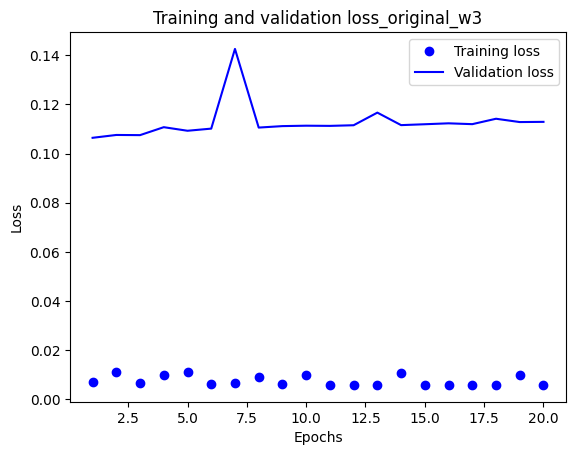

In [24]:
import matplotlib.pyplot as plt
history_dict_w3 = history_w3.history
loss_values = history_dict_w3["loss"]
val_loss_values = history_dict_w3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss_original_w3")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

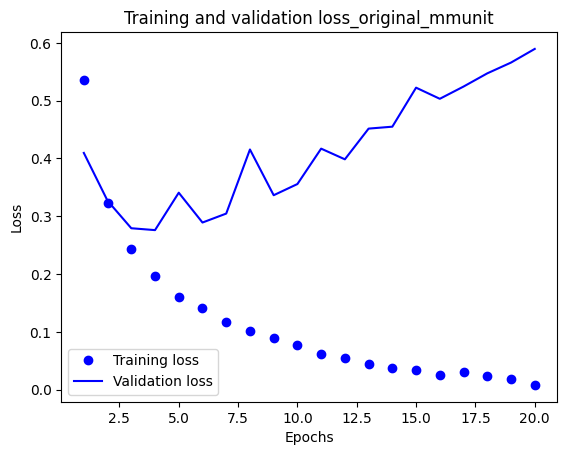

In [35]:
import matplotlib.pyplot as plt
history_dict_munit = history_munit.history
loss_values = history_dict_munit["loss"]
val_loss_values = history_dict_munit["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss_original_mmunit")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

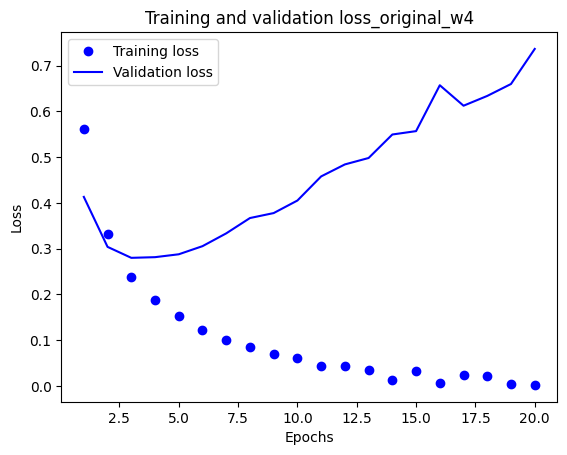

In [39]:
import matplotlib.pyplot as plt
history_dict_w4 = history_w4.history
loss_values = history_dict_w4["loss"]
val_loss_values = history_dict_w4["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss_original_w4")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

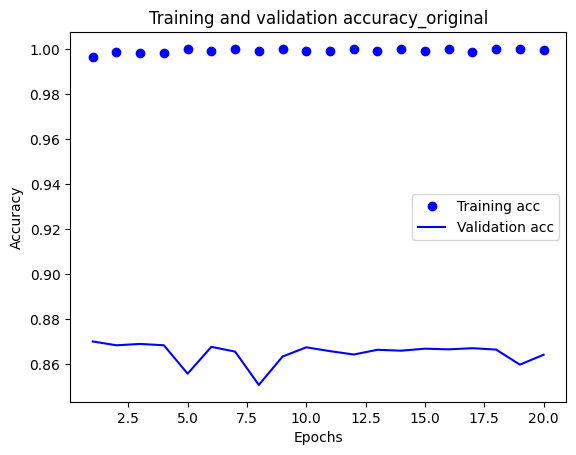

In [26]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy_original")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

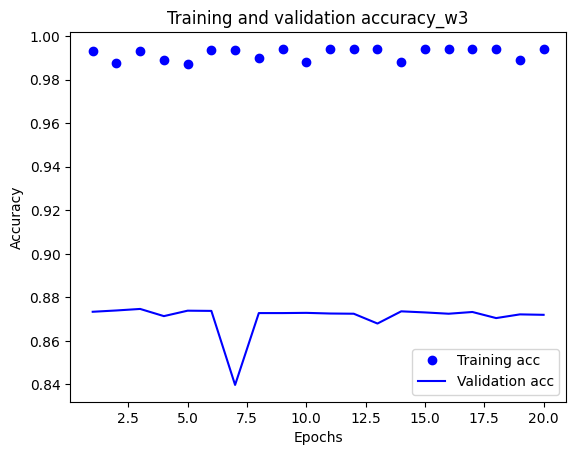

In [27]:
plt.clf()
acc = history_dict_w3["accuracy"]
val_acc = history_dict_w3["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy_w3")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

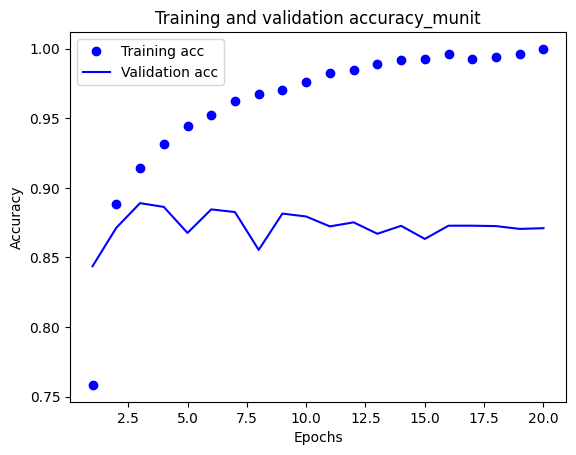

In [36]:
plt.clf()
acc = history_dict_munit["accuracy"]
val_acc = history_dict_munit["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy_munit")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

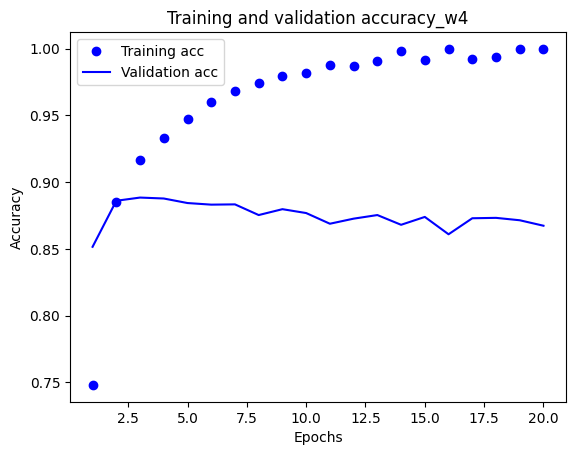

In [40]:
plt.clf()
acc = history_dict_w4["accuracy"]
val_acc = history_dict_w4["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy_w4")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [41]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 14ms/step - loss: 0.4908 - accuracy: 0.8106
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2894 - accuracy: 0.9001
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2256 - accuracy: 0.9176
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2782 - accuracy: 0.8894


In [42]:
results

[0.2782193720340729, 0.8894400000572205]

In [43]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 14ms/step - loss: 0.4647 - accuracy: 0.8000
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2651 - accuracy: 0.9030
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2078 - accuracy: 0.9229
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2976 - accuracy: 0.8826


[0.2976253032684326, 0.8825600147247314]

In [19]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=256)
model.evaluate(x_test, y_test)

Epoch 1/10
98/98 [==============================] - 2s 10ms/step - loss: 0.4349 - accuracy: 0.8178
Epoch 2/10
98/98 [==============================] - 1s 10ms/step - loss: 0.2315 - accuracy: 0.9136
Epoch 3/10
98/98 [==============================] - 1s 8ms/step - loss: 0.1804 - accuracy: 0.9343
Epoch 4/10
98/98 [==============================] - 1s 8ms/step - loss: 0.1487 - accuracy: 0.9469
Epoch 5/10
98/98 [==============================] - 1s 7ms/step - loss: 0.1232 - accuracy: 0.9562
Epoch 6/10
98/98 [==============================] - 1s 7ms/step - loss: 0.1031 - accuracy: 0.9644
Epoch 7/10
98/98 [==============================] - 1s 8ms/step - loss: 0.0824 - accuracy: 0.9723
Epoch 8/10
98/98 [==============================] - 1s 7ms/step - loss: 0.0653 - accuracy: 0.9790
Epoch 9/10
98/98 [==============================] - 1s 8ms/step - loss: 0.0496 - accuracy: 0.9848
Epoch 10/10
782/782 [==============================] - 2s 3ms/step - loss: 0.6159 - accuracy: 0.8608


[0.6159096360206604, 0.8608400225639343]

### Using a trained model to generate predictions on new data

In [20]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.02330747],
       [1.        ],
       [0.99931836],
       ...,
       [0.15441917],
       [0.01968427],
       [0.9976937 ]], dtype=float32)

### Further experiments

### Wrapping up

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [22]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [23]:
len(train_data)

8982

In [24]:
len(test_data)

2246

In [25]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [26]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [27]:
train_labels[10]

3

### Preparing the data

**Encoding the input data**

In [28]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [29]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [30]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

**Model definition**

In [31]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [32]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [37]:
model_2 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model_2.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [34]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [35]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 35ms/step - loss: 2.9036 - accuracy: 0.4914 - val_loss: 1.9990 - val_accuracy: 0.5920
Epoch 2/20
16/16 [==============================] - 0s 19ms/step - loss: 1.6346 - accuracy: 0.6649 - val_loss: 1.4308 - val_accuracy: 0.6820
Epoch 3/20
16/16 [==============================] - 0s 23ms/step - loss: 1.2223 - accuracy: 0.7347 - val_loss: 1.2124 - val_accuracy: 0.7410
Epoch 4/20
16/16 [==============================] - 0s 25ms/step - loss: 0.9996 - accuracy: 0.7841 - val_loss: 1.0967 - val_accuracy: 0.7670
Epoch 5/20
16/16 [==============================] - 0s 21ms/step - loss: 0.8404 - accuracy: 0.8235 - val_loss: 1.0251 - val_accuracy: 0.7710
Epoch 6/20
16/16 [==============================] - 0s 16ms/step - loss: 0.7077 - accuracy: 0.8508 - val_loss: 0.9630 - val_accuracy: 0.8040
Epoch 7/20
16/16 [==============================] - 0s 19ms/step - loss: 0.5934 - accuracy: 0.8766 - val_loss: 0.9178 - val_accuracy: 0.8140
Epoch 8/20
16

In [38]:
history_2 = model_2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 34ms/step - loss: 2.6428 - accuracy: 0.5525 - val_loss: 1.8870 - val_accuracy: 0.6510
Epoch 2/20
16/16 [==============================] - 0s 19ms/step - loss: 1.5839 - accuracy: 0.7006 - val_loss: 1.4196 - val_accuracy: 0.6990
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 1.1913 - accuracy: 0.7576 - val_loss: 1.1872 - val_accuracy: 0.7490
Epoch 4/20
16/16 [==============================] - 0s 18ms/step - loss: 0.9607 - accuracy: 0.8022 - val_loss: 1.0605 - val_accuracy: 0.7720
Epoch 5/20
16/16 [==============================] - 0s 19ms/step - loss: 0.8018 - accuracy: 0.8324 - val_loss: 0.9735 - val_accuracy: 0.7970
Epoch 6/20
16/16 [==============================] - 0s 20ms/step - loss: 0.6779 - accuracy: 0.8634 - val_loss: 0.9228 - val_accuracy: 0.8010
Epoch 7/20
16/16 [==============================] - 0s 16ms/step - loss: 0.5803 - accuracy: 0.8837 - val_loss: 0.8753 - val_accuracy: 0.8110
Epoch 8/20
16

**Plotting the training and validation loss**

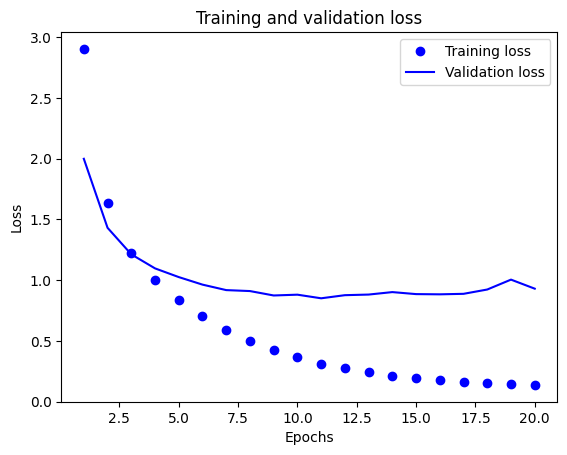

In [40]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

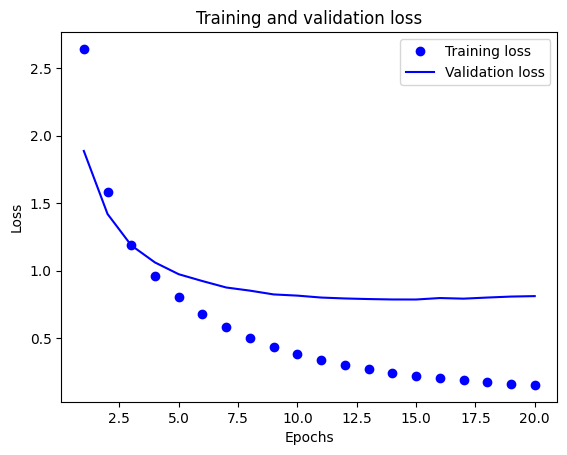

In [41]:
import matplotlib.pyplot as plt

loss = history_2.history["loss"]
val_loss = history_2.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

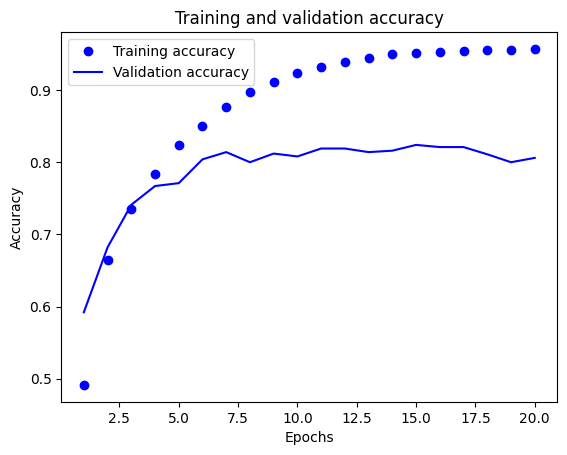

In [42]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

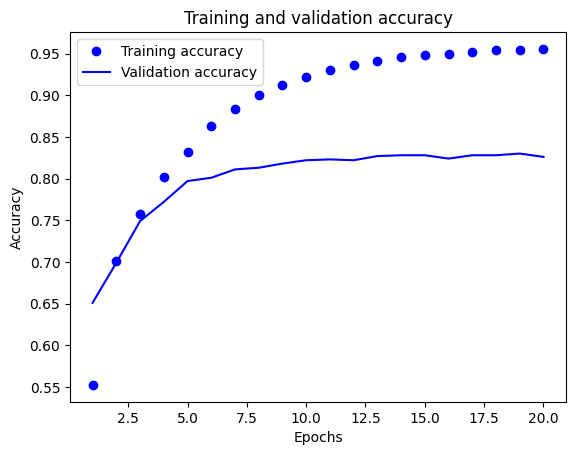

In [43]:
plt.clf()
acc = history_2.history["accuracy"]
val_acc = history_2.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [44]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 14ms/step - loss: 2.5289 - accuracy: 0.4997
Epoch 2/9
18/18 [==============================] - 0s 14ms/step - loss: 1.3962 - accuracy: 0.6972
Epoch 3/9
18/18 [==============================] - 0s 14ms/step - loss: 1.0799 - accuracy: 0.7614
Epoch 4/9
18/18 [==============================] - 0s 14ms/step - loss: 0.8721 - accuracy: 0.8121
Epoch 5/9
18/18 [==============================] - 0s 15ms/step - loss: 0.7163 - accuracy: 0.8466
Epoch 6/9
18/18 [==============================] - 0s 14ms/step - loss: 0.5831 - accuracy: 0.8754
Epoch 7/9
18/18 [==============================] - 0s 14ms/step - loss: 0.4830 - accuracy: 0.8992
Epoch 8/9
18/18 [==============================] - 0s 14ms/step - loss: 0.4025 - accuracy: 0.9143
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.8994 - accuracy: 0.7947


In [45]:
results

[0.8994457125663757, 0.7947462201118469]

In [46]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.18076580587711488

### Generating predictions on new data

In [47]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [48]:
predictions[0].shape

(46,)

In [49]:
np.sum(predictions[0])

0.9999999

In [50]:
np.argmax(predictions[0])

3

### A different way to handle the labels and the loss

In [51]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [52]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [53]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 10ms/step - loss: 2.8306 - accuracy: 0.2221 - val_loss: 2.2099 - val_accuracy: 0.2420
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 1.8949 - accuracy: 0.5406 - val_loss: 1.7002 - val_accuracy: 0.5760
Epoch 3/20
63/63 [==============================] - 1s 8ms/step - loss: 1.5480 - accuracy: 0.5975 - val_loss: 1.5821 - val_accuracy: 0.5770
Epoch 4/20
63/63 [==============================] - 0s 8ms/step - loss: 1.3899 - accuracy: 0.6143 - val_loss: 1.5079 - val_accuracy: 0.6170
Epoch 5/20
63/63 [==============================] - 0s 8ms/step - loss: 1.2712 - accuracy: 0.6495 - val_loss: 1.4709 - val_accuracy: 0.6470
Epoch 6/20
63/63 [==============================] - 0s 8ms/step - loss: 1.1795 - accuracy: 0.6802 - val_loss: 1.4612 - val_accuracy: 0.6580
Epoch 7/20
63/63 [==============================] - 0s 8ms/step - loss: 1.1030 - accuracy: 0.7119 - val_loss: 1.4354 - val_accuracy: 0.6580
Epoch 8/20
63/63 [=

### Further experiments

### Wrapping up

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [56]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [57]:
train_data.shape

(404, 13)

In [58]:
test_data.shape

(102, 13)

In [59]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

**Normalizing the data**

In [60]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

In [61]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [62]:
def build_model_2():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [63]:
def build_model_3():
    model = keras.Sequential([
        layers.Dense(128, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [64]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [67]:
all_scores

[1.9285825490951538, 2.521106004714966, 2.559837818145752, 2.4924468994140625]

In [66]:
np.mean(all_scores)

2.3754933178424835

In [68]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model_2()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

np.mean(all_scores)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


2.2839090824127197

In [69]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model_3()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

np.mean(all_scores)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


2.458397090435028

**Saving the validation logs at each fold**

In [70]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Building the history of successive mean K-fold validation scores**

In [71]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

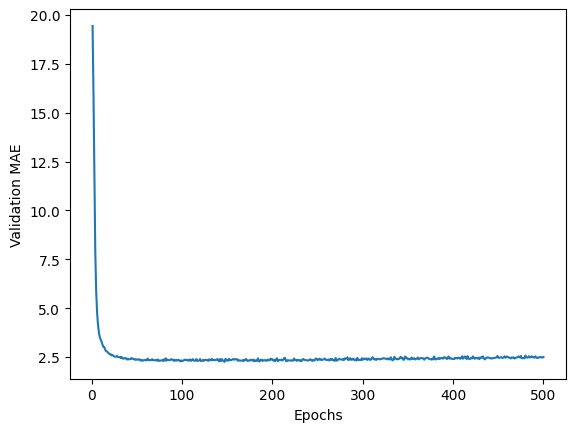

In [72]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

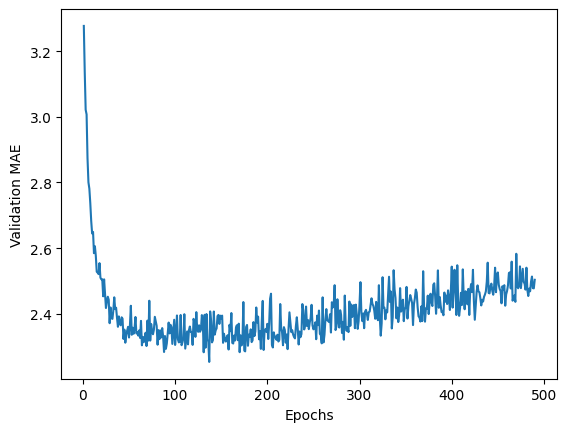

In [73]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [74]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 6ms/step - loss: 15.5160 - mae: 2.5348


In [75]:
test_mae_score

2.5348265171051025

### Generating predictions on new data

In [76]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 3ms/step


array([8.71784], dtype=float32)

### Wrapping up

## Summary